В этой части проекта вам нужно написать несколько SQL-запросов в Jupyter Notebook. Эти задания проверят вручную, и вы получите комментарии к составленным запросам. 

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. Вспомните инструкцию из [урока про представление результатов](https://practicum.yandex.ru/learn/data-analyst-plus/courses/96ccbf7a-b65d-4f51-b5f3-18360ad1e301/sprints/6116/topics/27f7c9a7-a474-4a82-8392-b3f069b26f69/lessons/e12d84bb-ffa8-490c-8bde-0935d86ceccb/). Пример кода для подключения к базе и выгрузки результатов вы найдёте и в этой тетрадке. 

Некоторые задания включают дополнительные вопросы — не пропустите их. На часть вопросов можно ответить текстом, а для некоторых понадобится визуализация. Помните, что результат запроса можно выгрузить в датафрейм. 

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [4]:
# напишите запрос
query = '''
    SELECT
        DATE_TRUNC('month', creation_date) AS month_date,
        SUM(views_count)                   AS total_views
    FROM
        stackoverflow.posts
    WHERE EXTRACT(YEAR FROM creation_date) = 2008
    GROUP BY month_date
    ORDER BY total_views DESC;
'''

# выполните запрос
query_result = pd.read_sql_query(query, con = engine) 
query_result.set_index('month_date', inplace=True)
query_result

,total_views
month_date,
2008-09-01,452928568
2008-10-01,365400138
2008-11-01,221759651
2008-12-01,197792841
2008-08-01,131367083
2008-07-01,669895


<details>

<summary>Подсказка</summary>
Используйте функцию для усечения даты, а затем сгруппируйте и отсортируйте данные.
</details>

Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

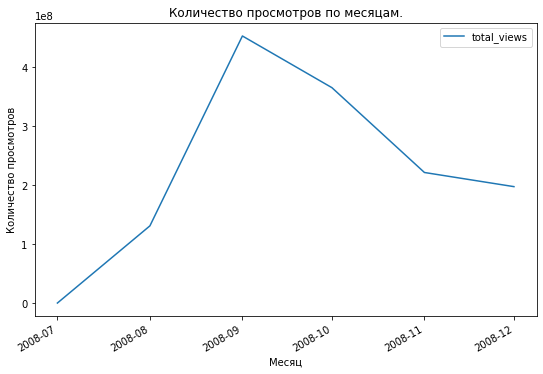

In [5]:
# напишите ваш ответ здесь

query_result.plot(y='total_views', title='Количество просмотров по месяцам.', figsize=(9,6))
plt.ylabel('Количество просмотров')
plt.xlabel('Месяц')
plt.show()

Отличия могут связаны с началом учебного года. В июле и августе наименьшее количество просмотров за весь данный период так как у большинства студентов и школьников каникулы. Затем значительный рост в сентябре и плавный спад к декабрю. Что школьники, что студенты по мере продвижения учебного года учатся все меньше и меньше в сравнении с началом. Взглянув еще на январь следующего года, мы видим еще больший пик чем в сентябре - это, скорее всего, сессия, когда студенты начинают судорожно готовиться к экзаменам.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [6]:
# напишите запрос
query = '''
SELECT
    u.display_name,
    COUNT(DISTINCT u.id) AS user_cnt
FROM
    stackoverflow.users AS u 
JOIN stackoverflow.posts AS p ON u.id = p.user_id
JOIN stackoverflow.post_types AS pt ON p.post_type_id = pt.id
WHERE pt.type = 'Answer' AND (u.creation_date <= p.creation_date) 
                         AND (p.creation_date - u.creation_date <= '30 days')
GROUP BY u.display_name
HAVING COUNT(p.id) > 100
ORDER BY u.display_name;
'''

# выполните запрос
query_result = pd.read_sql_query(query, con = engine) 
query_result

,display_name,user_cnt
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
71,leppie,1
72,lomaxx,1
73,mattlant,1
74,paxdiablo,1


<details>

<summary>Подсказка</summary>
Вам нужно присоединить несколько таблиц — изучите внимательнее описание базы. Чтобы добавить промежуток времени к дате, используйте ключевое слово INTERVAL, например, так: <дата> + INTERVAL '1 year 2 months 3 days'
.</details>

Какие аномалии наблюдаются в данных? О чём они говорят?

У каждого пользователя есть уникальный идентификатор, однако отображаемое имя не является уникальным и как можно заметить есть достаточно много повторений. Т

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [7]:
# напишите запрос
query = '''
SELECT
    DATE_TRUNC('month', creation_date)::date AS month_date,
    COUNT(id) AS num_posts
FROM
    stackoverflow.posts 
WHERE user_id IN
                (
                    SELECT
                        DISTINCT u.id
                    FROM
                        stackoverflow.users AS u
                    JOIN stackoverflow.posts AS p ON u.id = p.user_id
                    WHERE (u.creation_date::DATE >= '2008-09-01' AND u.creation_date::DATE <= '2008-09-30')
                    AND (p.creation_date::DATE >= '2008-12-01' AND p.creation_date::DATE <= '2008-12-31')
                )
GROUP BY month_date
ORDER BY month_date DESC;
'''

# выполните запрос
query_result = pd.read_sql_query(query, con = engine) 
query_result

,month_date,num_posts
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые зарегистрировались в сентябре 2008 года и оставили хотя бы один пост в декабре. Затем используйте результат для среза и посчитайте посты по месяцам.</details>

Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

Похоже пользователи зарегистрировавшиеся в сентябре больше всего были активны как раз таки в сентябре и октябре. Дальше активность начинает падать. Однако если взглянуть на первый месяц слудеющего года, то увидим снова приток количества постов.

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [8]:
# напишите запрос
query = '''
SELECT
    user_id,
    creation_date,
    views_count,
    SUM(views_count) OVER(PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
FROM
    stackoverflow.posts
ORDER BY user_id
LIMIT 100;
'''

# выполните запрос
query_result = pd.read_sql_query(query, con = engine) 
query_result

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
95,4,2008-09-14 19:51:49,1973,1973
96,4,2008-09-16 08:59:23,0,1973
97,4,2008-09-17 00:04:02,0,1973
98,4,2008-09-17 01:14:02,0,1973


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [9]:
# напишите запрос
query = '''
WITH user_day_cnt AS (
    SELECT
        user_id,
        creation_date::date,
        COUNT(id) AS num_posts
    FROM
        stackoverflow.posts
    WHERE user_id IN (
        SELECT
            user_id
        FROM
            stackoverflow.posts
        WHERE creation_date::DATE >= '2008-08-01' AND creation_date::DATE <= '2008-08-31'
        GROUP BY user_id
        HAVING COUNT(id) > 120
    )
    AND creation_date::DATE >= '2008-08-01' AND creation_date::DATE <= '2008-08-31'
    GROUP BY user_id, creation_date::date
)

SELECT
    user_id,
    AVG(num_posts) AS avg_daily
FROM
    user_day_cnt
GROUP BY user_id
ORDER BY avg_daily;
'''

# выполните запрос
query_result = pd.read_sql_query(query, con = engine) 
query_result

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые написали более 120 постов за август. Используя этот запрос в качестве подзапроса для среза, найдите и сохраните во временную таблицу идентификаторы нужных пользователей, дни августа и количество постов в день. В основном запросе сгруппируйте данные по пользователям и найдите для каждого из них среднее количество постов.
</details>

# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [10]:
# напишите запрос
query = '''
SELECT
    AVG(days_interact)::INTEGER AS result
FROM
    (
        SELECT
            user_id,
            COUNT(DISTINCT creation_date::date) AS days_interact
        FROM
            stackoverflow.posts
        WHERE creation_date::DATE BETWEEN '2008-12-01' AND '2008-12-07'
        GROUP BY user_id
        ORDER BY days_interact
    ) AS subq
'''

# выполните запрос
query_result = pd.read_sql_query(query, con = engine) 
query_result

,result
0,2


<details>

<summary>Подсказка</summary>
Посчитайте, сколько активных дней было у каждого пользователя. Добавьте данные во временную таблицу и используйте в основном запросе.
</details>

Проанализируйте итоговую таблицу — какие выводы можно сделать?

Пользователи в период с 1 по 7 декабря 2008 года в среднем взаимодействовали с сайтом 2 дня.

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [11]:
# напишите запрос
query = '''
SELECT
    user_id,
    creation_date,
    TO_CHAR(creation_date, 'Month') AS post_month,
    LAG(TO_CHAR(creation_date, 'Month'), 2, NULL) OVER(PARTITION BY user_id ORDER BY creation_date)
FROM
    stackoverflow.posts
ORDER BY user_id, creation_date
LIMIT 100;
'''

# выполните запрос
query_result = pd.read_sql_query(query, con = engine) 
query_result

,user_id,creation_date,post_month,lag
0,1,2008-07-31 23:41:00,July,None
1,1,2008-07-31 23:55:38,July,None
2,1,2008-07-31 23:56:41,July,July
3,1,2008-08-04 02:45:08,August,July
4,1,2008-08-04 04:31:03,August,July
...,...,...,...,...
95,4,2008-09-14 19:51:49,September,August
96,4,2008-09-16 08:59:23,September,August
97,4,2008-09-17 00:04:02,September,September
98,4,2008-09-17 01:14:02,September,September


<details>

<summary>Подсказка</summary>
Преобразовать результат оконной функции в нужное значение вам поможет аналог условного оператора в SQL: CASE <поле> WHEN <старое значение> THEN <новое значение> END.
</details>

# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [12]:
# напишите запрос
query = '''
WITH cohorts AS (
    SELECT
        user_id,
        cohort_dt,
        COUNT(user_id) OVER(PARTITION BY cohort_dt) AS cohort_cnt
    FROM (
            SELECT
                user_id,
                MIN(DATE_TRUNC('month', creation_date)::date) AS cohort_dt
            FROM
                stackoverflow.posts
            GROUP BY user_id
    ) AS profiles
),

user_activity AS (
    SELECT
        user_id,
        DATE_TRUNC('month', creation_date)::DATE AS creation_dt
    FROM
        stackoverflow.posts
    GROUP BY user_id, creation_dt
)

SELECT
    cohort_dt,
    creation_dt                                       AS session_dt,
    COUNT(c.user_id)                                  AS users_cnt,
    cohort_cnt                                        AS cohort_users_cnt,
    ROUND(COUNT(c.user_id) * 100.0 / cohort_cnt, 2)   AS retention_rate
FROM
    cohorts AS c
JOIN user_activity AS ua ON ua.user_id = c.user_id
GROUP BY cohort_dt, session_dt, cohort_users_cnt
ORDER BY cohort_dt, session_dt;
'''

# выполните запрос
query_result = pd.read_sql_query(query, con = engine) 
query_result

,cohort_dt,session_dt,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


<details>

<summary>Подсказка</summary>
Вспомните, как выглядел запрос для расчёта Retention Rate в теории. Создайте две временные таблицы: `profile` и `sessions` (в ней будет информация о публикациях), а затем используйте их в основном запросе.

Во временной таблице `profile` вам понадобятся три поля:

- идентификатор пользователя;
- дата первого поста пользователя, усечённая до месяца (признак начала когорты);
- количество пользователей этой когорты.
</details>

Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

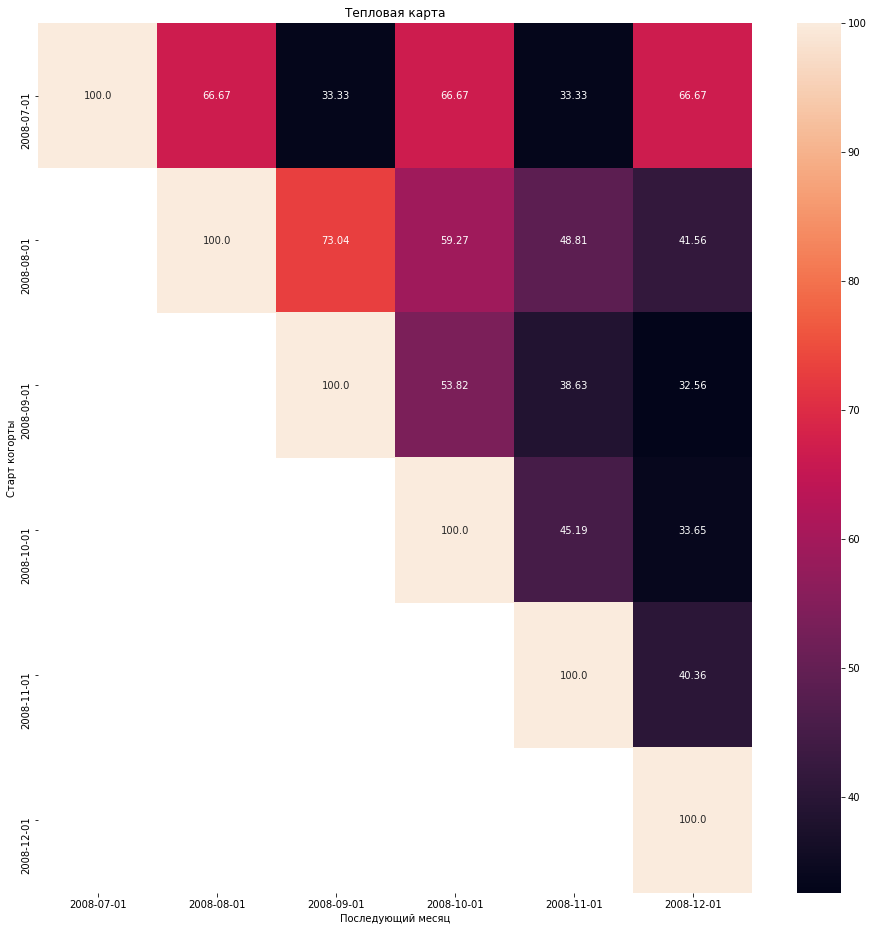

In [13]:
# постройте тепловую карту Retention Rate

retention = query_result.pivot('cohort_dt', 'session_dt', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]


plt.figure(figsize=(16, 16)) 
sns.heatmap(retention, 
            annot=True, 
            fmt='') 
plt.title('Тепловая карта') 
plt.ylabel('Старт когорты')
plt.xlabel('Последующий месяц')
plt.show() 

Retention rate первый двух месяцев от лета к зиме стабильно уменьшается. Лучшее значение наблюдается для сентября относительно августа. Много пользователей написавших первый пост в августе также сделали это и в сентябре. Думаю причина спада связана с тем же фактом, что и был описан в предыдущих описаниях.

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [14]:
# напишите запрос
query = '''
SELECT
    creation_month,
    posts_count,
    ROUND((posts_count::NUMERIC / LAG(posts_count) OVER(ORDER BY creation_month) - 1) * 100.0, 2) AS percentage
FROM (
            SELECT
                DATE_TRUNC('month', creation_date):: DATE AS creation_month,
                COUNT(id)                                 AS posts_count
            FROM
                stackoverflow.posts
            WHERE creation_date::DATE BETWEEN '2008-09-01' AND '2008-12-31'
            GROUP BY creation_month
) AS month_count
'''

# выполните запрос
query_result = pd.read_sql_query(query, con = engine) 
query_result.set_index('creation_month', inplace=True)
query_result

,posts_count,percentage
creation_month,,
2008-09-01,70371,NaN
2008-10-01,63102,-10.33
2008-11-01,46975,-25.56
2008-12-01,44592,-5.07


<details>

<summary>Подсказка</summary>
Эту задачу стоит декомпозировать. Сформируйте запрос, который отобразит номер месяца и количество постов. Затем можно использовать оконную функцию, которая вернёт значение за предыдущий месяц, и посчитать процент.
</details>

Постройте круговую диаграмму с количеством постов по месяцам.

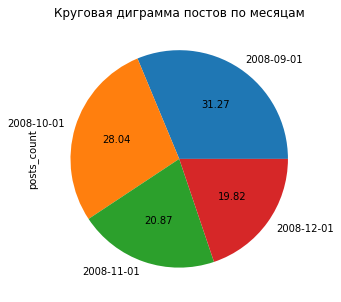

In [15]:
# постройте круговую диаграмму с количеством постов по месяцам
query_result.plot.pie(y='posts_count', figsize=(5,5), legend=None, autopct='%.2f')
plt.title('Круговая диграмма постов по месяцам') 
plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [16]:
# напишите запрос
query = '''
SELECT
    EXTRACT(WEEK FROM creation_date)::INTEGER AS week_creation,
    MAX(creation_date)::DATE                  AS creation_date
FROM
    stackoverflow.posts
WHERE user_id IN (
                    SELECT
                        user_id
                    FROM
                        stackoverflow.posts
                    GROUP BY user_id
                    ORDER BY COUNT(id) DESC
                    LIMIT 1
) AND creation_date::DATE BETWEEN '2008-10-01' AND '2008-10-31'
GROUP BY week_creation
'''

# выполните запрос
query_result = pd.read_sql_query(query, con = engine) 
query_result

,week_creation,creation_date
0,40,2008-10-05
1,41,2008-10-12
2,42,2008-10-19
3,43,2008-10-26
4,44,2008-10-31


<details>

<summary>Подсказка</summary>
Декомпозируйте задачу:
1) Найдите пользователя, который опубликовал больше всего постов. 2) Найдите дату и время создания каждого поста этого пользователя и номер недели. 
3) Отобразите данные только о последних постах пользователя. Для этого можно использовать оконную функцию.
</details>